# Describtion
 Do you trust all the news you hear from social media? All news are not real, right? So how will you detect the fake news? The answer is ML. By practicing this advanced ML project of detecting fake news, you will easily make a difference between real and fake news. Before moving ahead in this advanced ML project, get aware of the terms related to it like fake news, tfidfvectorizer, PassiveAggressive Classifier, Naive Bayes, Logistic Regrssion and SVC.

# Columns :
Title: The title of the article
Text: The text of the article
Subject: The subject of the article
Date: The date at which the article was posted

# Problem Statemtent
We will use these news record to detect if news is fake or real.

# Constraints:
The cost of a mis-classification can be high, it can cause chaos.
No Latency Requirement

# Benefits:
Can bring net neutrality.


Can stop potential fraud news.


## Importing Liabraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from prettytable import PrettyTable

## Loading dataset

In [2]:
fake_test = pd.read_csv('Fake.csv')
fake_test['label'] = 0 #Adding label: 0  to fake news
fake_test = fake_test[['text', 'label']]

In [3]:
true_test = pd.read_csv('True.csv')
true_test['label'] = 1 #Adding label: 1  to real news
true_test = true_test[['text', 'label']]

In [4]:
data = pd.concat([true_test, fake_test])
data = data.sample(frac = 1) 

In [5]:
data # Final Dataset

,text,label
11721,PRISTINA (Reuters) - Two Kosovo men pleaded gu...,1
13263,DUBLIN (Reuters) - It is not yet clear if Brit...,1
20882,MOSCOW (Reuters) - The positions of Moscow and...,1
10745,"(In this February 20 story, corrects in secon...",1
12047,President Barack Obama designated two national...,0
4037,WASHINGTON (Reuters) - A U.S. appeals court on...,1
10460,Project Veritas just released yet another vide...,0
3433,NEW YORK (Reuters) - Massachusetts Institute ...,1
4869,As white supremacists whine about Donald Trump...,0
13729,Senator Jess Sessions tough love talk may be ...,0


## Performing simple EDA

In [6]:
data.columns #Checking columns

Index(['text', 'label'], dtype='object')

In [7]:
data.isnull().sum() #Checking for null values

text     0
label    0
dtype: int64

In [8]:
data.isna().sum() #Checking for Nan values

text     0
label    0
dtype: int64

# Text Preproccesing

In [9]:

from nltk.stem.porter import PorterStemmer

import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from bs4 import BeautifulSoup


In [10]:
# DECONTRACTING 
# eg:  can't = can not
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase


In [11]:
# Defing Stopword Explictly
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [12]:
#Preprocessing the text

from tqdm import tqdm
preprocessed_text = []
# tqdm is for printing the status bar
for sentance in tqdm(data['text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_text.append(sentance.strip())


100%|██████████| 44898/44898 [01:15<00:00, 590.78it/s]


In [13]:
#Appending processed text into DATA

data['text']=preprocessed_text


In [14]:
data

,text,label
11721,pristina reuters two kosovo men pleaded guilty...,1
13263,dublin reuters not yet clear britain european ...,1
20882,moscow reuters positions moscow seoul north ko...,1
10745,february story corrects second paragraph ibrah...,1
12047,president barack obama designated two national...,0
4037,washington reuters u appeals court thursday gr...,1
10460,project veritas released yet another video cnn...,0
3433,new york reuters massachusetts institute techn...,1
4869,white supremacists whine donald trump flip flo...,0
13729,senator jess sessions tough love talk may exac...,0


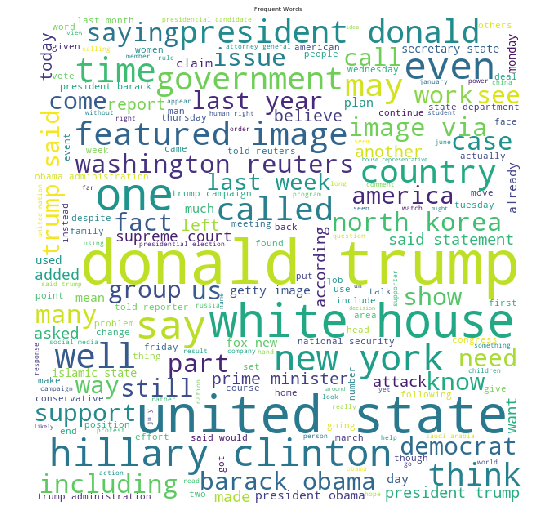

In [16]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt
fig, (ax1) = plt.subplots(1, figsize=[9, 9])
wordcloud = WordCloud( background_color='white',
                        width=600,
                        height=600).generate(" ".join(data['text']))
ax1.imshow(wordcloud)
ax1.axis('off')
ax1.set_title('Frequent Words',fontsize=6);

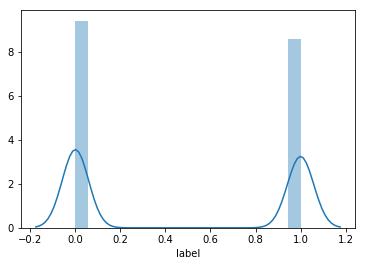

In [17]:
import seaborn as sns
sns.distplot(data['label']);


#  Label follows a gaussian distribution with fake being left skweked and truth being rightly skweked

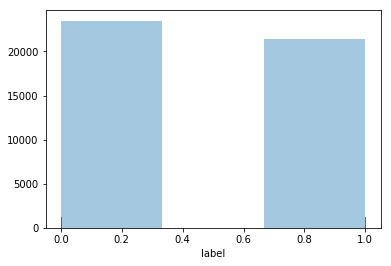

In [18]:
sns.distplot(data['label'], kde=False, rug=True,bins=3);


## Label is slightly unbalanced so will creating model this has to be taken care of as dataset is small and this can create baising

#### To solve this problem we will focus on Text and Label columns

In [19]:
X = data.text 
y = data.label
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.30, random_state = 100)
X_cv, X_test, y_cv, y_test = train_test_split(X_train, y_train, train_size = 0.30, random_state = 100)

/Users/abuzaid/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# Using TF-IDF to convert text into vectors

In [20]:
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', max_df = 0.7) # Creating tfidf object
tfidf_train = tfidf_vectorizer.fit_transform(X_train) #Converting Text to tfidf vectors
tfidf_cv = tfidf_vectorizer.transform(X_cv)
tfidf_test = tfidf_vectorizer.transform(X_test)

#                                           Creating Models

## 1. PassiveAggressiveClassifier

## Training

/Users/abuzaid/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Accuracy: 100.0


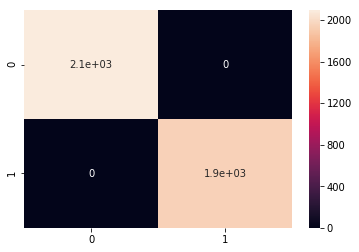

In [27]:
pac = PassiveAggressiveClassifier(max_iter = 50)
pac.fit(tfidf_train, y_train)
cv_pred = pac.predict(tfidf_cv)
pac_score_cv = accuracy_score(y_cv, cv_pred)*100
print('Accuracy:', pac_score_cv)
cm= confusion_matrix(y_cv, cv_pred)

sns.heatmap(cm,annot=True)

## Testing

~~~~~~~Accuracy on Test data~~~~~~~~~~~: 100.0


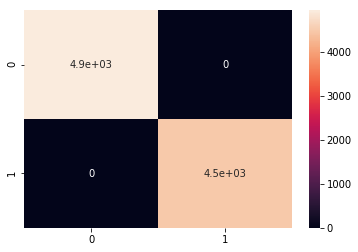

In [28]:
test_pred = pac.predict(tfidf_test)
pac_score_test = accuracy_score(y_test, test_pred)*100
print('~~~~~~~Accuracy on Test data~~~~~~~~~~~:', pac_score_test)
cm1= confusion_matrix(y_test, test_pred)

sns.heatmap(cm1,annot=True)

## 2. Logistic Reggression

#### Training

In [30]:
lr = LogisticRegression()
lr.fit(tfidf_train, y_train)
cv_pred = lr.predict(tfidf_cv)
lr_score_cv = accuracy_score(y_cv, cv_pred)*100
print('Accuracy:',lr_score_cv)
print(confusion_matrix(y_cv, cv_pred))

/Users/abuzaid/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 98.34158415841584
[[2057   36]
 [  31 1916]]


#### Testing

Accuracy on test data:  98.7061194188143


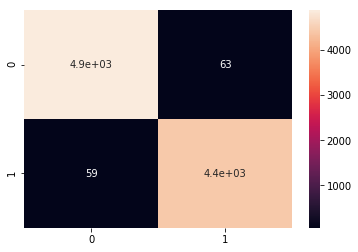

In [31]:
test_pred = lr.predict(tfidf_test)
lr_score_test = accuracy_score(y_test, test_pred)*100
print('Accuracy on test data: ',lr_score_test)
cm2= confusion_matrix(y_test, test_pred)
sns.heatmap(cm2,annot=True)

## 3. SVC

#### Training

In [21]:
svc = SVC()
svc.fit(tfidf_train, y_train)
cv_pred = svc.predict(tfidf_cv)
svc_score_cv = accuracy_score(y_cv, cv_pred)*100
print('Accuracy: ', svc_score_cv)
print(confusion_matrix(y_cv, cv_pred))

/Users/abuzaid/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy:  51.80693069306931
[[2093    0]
 [1947    0]]


#### Testing

Accuracy:  52.41276911655531


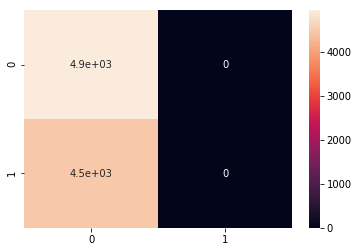

In [22]:
test_pred = svc.predict(tfidf_test)
svc_score_test = accuracy_score(y_test, test_pred)*100
print('Accuracy: ',svc_score_test)
cm3=confusion_matrix(y_test, test_pred)
sns.heatmap(cm3,annot=True)

## 4. Naive Bayes

## Training 

In [23]:
nb = GaussianNB()
nb.fit(tfidf_train.toarray(), y_train)
cv_pred = nb.predict(tfidf_cv.toarray())
nb_score_cv = accuracy_score(y_cv, cv_pred)*100
print('Accuracy: ',nb_score_cv)
print(confusion_matrix(y_cv, cv_pred))

Accuracy:  96.63366336633663
[[1957  136]
 [   0 1947]]


## Testing

Accuracy: 96.6062148690211


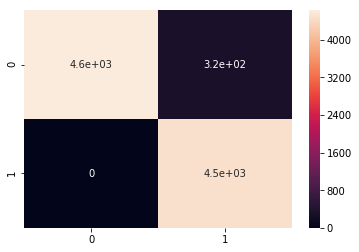

In [25]:
test_pred = nb.predict(tfidf_test.toarray())
nb_score_test = accuracy_score(y_test, test_pred)*100
print('Accuracy:', nb_score_test)
cm4=confusion_matrix(y_test, test_pred)
sns.heatmap(cm4,annot=True)

## Summary of all trained and tested models

In [32]:
x = PrettyTable()
x.field_names = ['Model Name', 'CV_Accuracy', 'Testing_Accuracy']
x.add_row(['PassiveAggressiveClassifier', pac_score_cv , pac_score_test])
x.add_row([" -------------------------"," ----------- "," ----------- "])
x.add_row(['Logistic Regression', lr_score_cv , lr_score_test])
x.add_row([" -------------------------"," ----------- "," ----------- "])
x.add_row(['Support Vector Classifier', svc_score_cv , svc_score_test])
x.add_row([" -------------------------"," ----------- "," ----------- "])
x.add_row(['Naive Bayes', nb_score_cv , nb_score_test])
print(x)

+-----------------------------+-------------------+-------------------+
|          Model Name         |    CV_Accuracy    |  Testing_Accuracy |
+-----------------------------+-------------------+-------------------+
| PassiveAggressiveClassifier |       100.0       |       100.0       |
|   ------------------------- |    -----------    |    -----------    |
|     Logistic Regression     | 98.34158415841584 |  98.7061194188143 |
|   ------------------------- |    -----------    |    -----------    |
|  Support Vector Classifier  | 51.80693069306931 | 52.41276911655531 |
|   ------------------------- |    -----------    |    -----------    |
|         Naive Bayes         | 96.63366336633663 |  96.6062148690211 |
+-----------------------------+-------------------+-------------------+


# Conclusion :  Passive Aggressive Classiffier having train and test best accuracy as well as Confusion matrix shows it classsify correctly

#  TEST MODEL

In [63]:
text='WASHINGTON (Reuters) - A U.S. appeals court on'

In [64]:
def preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")                           .replace("€", " euro ").replace("'ll", " will")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    x = re.sub(r"http\S+", "", x)
    
    porter = PorterStemmer()
    pattern = re.compile('\W')
    
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)
    
    
    if type(x) == type(''):
        x = porter.stem(x)
        example1 = BeautifulSoup(x)
        x = example1.get_text()
               
    
    return x


In [65]:
text =  preprocess(text)


In [66]:
text

'washington  reuters    a u s  appeals court on'

In [67]:
text_vect = tfidf_vectorizer.transform(([text]))       #transforming test text using TFIDF 


In [68]:
pred = pac.predict(text_vect)


In [69]:
pred

array([1])